In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

2023-12-13 21:04:37.741762: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 21:04:37.745081: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 21:04:37.792109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 21:04:37.792146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 21:04:37.793207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
df=pd.read_csv('/home/dai/DL/MyPractise/train.csv',index_col=0)

In [3]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


In [4]:
df.isna().any()

N_Days           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
Status           False
dtype: bool

In [5]:
x= df.drop('Status',axis=1)
y=df['Status']

In [6]:
y

id
0       D
1       C
2       D
3       C
4       C
       ..
7900    C
7901    C
7902    D
7903    D
7904    C
Name: Status, Length: 7905, dtype: object

In [7]:
x=pd.get_dummies(x,drop_first=True)

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_Days          7905 non-null   int64  
 1   Age             7905 non-null   int64  
 2   Bilirubin       7905 non-null   float64
 3   Cholesterol     7905 non-null   float64
 4   Albumin         7905 non-null   float64
 5   Copper          7905 non-null   float64
 6   Alk_Phos        7905 non-null   float64
 7   SGOT            7905 non-null   float64
 8   Tryglicerides   7905 non-null   float64
 9   Platelets       7905 non-null   float64
 10  Prothrombin     7905 non-null   float64
 11  Stage           7905 non-null   float64
 12  Drug_Placebo    7905 non-null   bool   
 13  Sex_M           7905 non-null   bool   
 14  Ascites_Y       7905 non-null   bool   
 15  Hepatomegaly_Y  7905 non-null   bool   
 16  Spiders_Y       7905 non-null   bool   
 17  Edema_S         7905 non-null   bool  

In [9]:
lbl=LabelEncoder()
y=pd.DataFrame(lbl.fit_transform(y),columns=['Status'])
y

,Status
0,2
1,0
2,2
3,0
4,0
...,...
7900,0
7901,0
7902,2
7903,2


In [10]:
x

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
id,,,,,,,,,,,,,,,,,,,
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,False,True,False,False,False,False,False
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,True,False,False,False,False,False,False
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,True,False,False,True,True,False,True
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,True,False,False,False,False,False,False
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,16839,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,False,False,False,False,False,False,False
7901,1492,17031,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,True,False,False,True,False,False,False
7902,1576,25873,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,False,False,False,False,True,True,False


In [11]:
sc= StandardScaler()
x=sc.fit_transform(x)

In [12]:
x

array([[-0.94242984,  0.85844803, -0.0772374 , ..., -0.57009506,
        -0.23055905, -0.21362331],
       [ 0.4970246 ,  0.23476028, -0.44442941, ..., -0.57009506,
        -0.23055905, -0.21362331],
       [ 1.27752879, -1.26263383,  0.18504261, ...,  1.75409342,
        -0.23055905,  4.68113699],
       ...,
       [-0.41508685,  2.03815544, -0.1559214 , ...,  1.75409342,
         4.33728372, -0.21362331],
       [ 1.42010333,  1.24652041, -0.49688541, ..., -0.57009506,
        -0.23055905, -0.21362331],
       [-0.04768324,  0.23476028, -0.49688541, ..., -0.57009506,
        -0.23055905, -0.21362331]])

In [13]:
x.shape

(7905, 19)

In [14]:
y['Status'].unique()

array([2, 0, 1])

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=42)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5533, 19), (2372, 19), (5533, 1), (2372, 1))

In [17]:
type(x_test)

numpy.ndarray

In [18]:
x_train=x_train.astype('float64')
x_test = x_test.astype('float64')
y_train = y_train.to_numpy().astype('float64')
y_test = y_test.to_numpy().astype('float64')

In [19]:
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [20]:
l2 = tf.keras.regularizers.L2(l2=0.01)

In [21]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(15,
                          activation = 'relu',
                          kernel_regularizer=l2),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.activations.swish(),
    tf.keras.layers.Dropout(rate=0.02),
    tf.keras.layers.Dense(11,
                          activation = 'relu',
                          kernel_regularizer=l2),
    # tf.keras.layers.BatchNormalization(),                        
    # tf.keras.activations.swish(),
    tf.keras.layers.Dense(7,
                          activation = 'relu',
                          kernel_regularizer=l2),
    tf.keras.layers.Dropout(rate=0.02),
    tf.keras.layers.Dense(3)
    ])

In [22]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,validation_data=[x_test,y_test],batch_size=32,epochs=100,verbose=1)

Epoch 1/100
173/173 [==============================] - 2s 7ms/step - loss: 1.0386 - accuracy: 0.7103 - val_loss: 0.8405 - val_accuracy: 0.7778
Epoch 2/100
173/173 [==============================] - 1s 6ms/step - loss: 0.7721 - accuracy: 0.7875 - val_loss: 0.7461 - val_accuracy: 0.7833
Epoch 3/100
173/173 [==============================] - 1s 6ms/step - loss: 0.6981 - accuracy: 0.7929 - val_loss: 0.6789 - val_accuracy: 0.7888
Epoch 4/100
173/173 [==============================] - 1s 6ms/step - loss: 0.6490 - accuracy: 0.7969 - val_loss: 0.6377 - val_accuracy: 0.7901
Epoch 5/100
173/173 [==============================] - 1s 6ms/step - loss: 0.6201 - accuracy: 0.8005 - val_loss: 0.6144 - val_accuracy: 0.7922
Epoch 6/100
173/173 [==============================] - 1s 6ms/step - loss: 0.5982 - accuracy: 0.8019 - val_loss: 0.5985 - val_accuracy: 0.7976
Epoch 7/100
173/173 [==============================] - 1s 6ms/step - loss: 0.5848 - accuracy: 0.8017 - val_loss: 0.5889 - val_accuracy: 0.7968

In [24]:
res_df=pd.DataFrame(history.history)

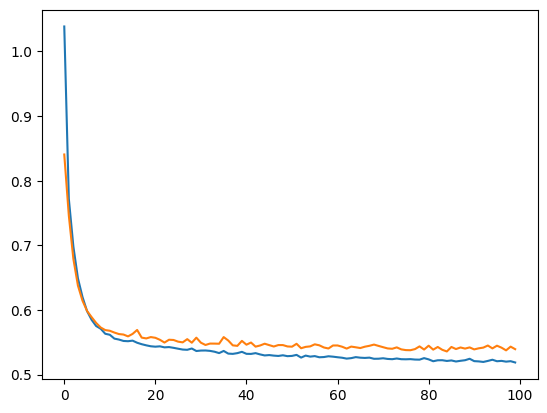

In [25]:

plt.plot(res_df[['loss','val_loss']])


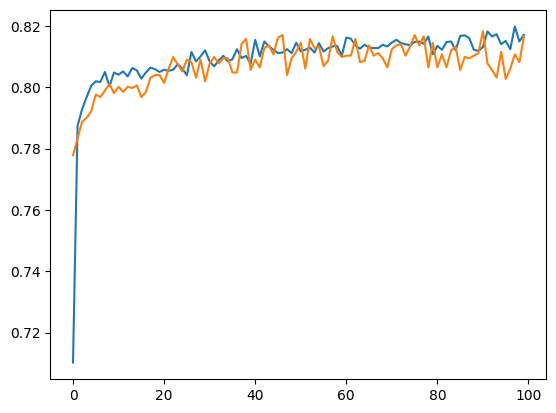

In [26]:
plt.plot(res_df[['accuracy','val_accuracy']])

In [27]:
res_df[res_df["val_loss"]==res_df["val_loss"].min()]

,loss,accuracy,val_loss,val_accuracy
84,0.521076,0.812037,0.535771,0.813238


In [30]:
test_df = pd.read_csv('test.csv',index_col=0)

In [32]:
test_df=pd.get_dummies(test_df,drop_first=True)

In [33]:
test_df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
id,,,,,,,,,,,,,,,,,,,,,
7905,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,...,False,True,False,False,True,True,False,True,False,False
7906,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,...,False,True,False,True,False,True,False,True,False,False
7907,51,13149,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,...,False,True,False,False,True,True,False,False,False,True
7908,2330,20510,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,...,False,True,False,True,False,True,False,True,False,False
7909,1615,21904,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,...,False,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,12279,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,...,False,True,False,True,False,True,False,True,False,False
13172,1770,24803,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,...,False,True,False,True,False,True,False,True,False,False
13173,3707,16990,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,...,False,True,False,False,True,True,False,True,False,False


In [35]:
test_df=sc.fit_transform(test_df)

In [37]:
test_df

array([[ 1.65660849,  0.34218588, -0.36354571, ...,  0.3183351 ,
        -0.22870472, -0.21018066],
       [ 0.39503764, -0.98303306, -0.38950605, ...,  0.3183351 ,
        -0.22870472, -0.21018066],
       [-1.8290446 , -1.49258239, -0.155863  , ..., -3.14134386,
        -0.22870472,  4.75781161],
       ...,
       [ 1.53514434, -0.42074286, -0.46738707, ...,  0.3183351 ,
        -0.22870472, -0.21018066],
       [-0.75703144, -1.87655823, -0.49334741, ...,  0.3183351 ,
        -0.22870472, -0.21018066],
       [ 0.21468178,  0.86568782, -0.155863  , ...,  0.3183351 ,
        -0.22870472, -0.21018066]])

In [36]:
y_pred=model.predict(test_df)
df_pred=pd.DataFrame(y_pred,columns=['Status'])


ValueError: in user code:

    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/dai/anaconda3/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 19, but received input with shape (None, 25)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 25), dtype=float32)
      • training=False
      • mask=None
